In [48]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import json
import os
from os.path import join

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report, f1_score

In [2]:
## Runing on Colab
## /content/drive/MyDrive/git/cyberbullying/input/hate_speech/MMHS150K_GT.json
# dataset_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech' 
# img_txt_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech/img_txt' 
# img_resized_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech/img_resized' 
# splits_directory = '/content/drive/MyDrive/git/cyberbullying/input/hate_speech/splits' 

## Runing on Local
dataset_directory = 'D:\\git\\cyberbullying\\input\\hate_speech' 
img_txt_directory = 'D:\\git\\cyberbullying\\input\\hate_speech\\img_txt' 
img_resized_directory = 'D:\\git\\cyberbullying\\input\\hate_speech\\img_resized' 
splits_directory = 'D:\\git\\cyberbullying\\input\\hate_speech\\splits' 

In [3]:
with open(join(dataset_directory,'MMHS150K_GT.json')) as json_file:
    hate_speech_data = json.load(json_file)

In [4]:
hate_speech_ori = pd.DataFrame(hate_speech_data)

In [5]:
hate_speech_ori.head(5)

,1114679353714016256,1063020048816660480,1108927368075374593,1114558534635618305,1035252480215592966,1106978219654303744,1113920043568463874,1114588617693966336,1045809514740666370,1108178453910695936,...,1116534812263710720,1062161948748513280,1107392307815477250,1105465552544374786,1114066031071453184,1114170734472048640,1110368198786846720,1106941858540851200,1105268309233188865,1114653514364530691
img_url,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,http://pbs.twimg.com/ext_tw_video_thumb/106301...,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,http://pbs.twimg.com/ext_tw_video_thumb/111401...,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,http://pbs.twimg.com/media/D1zG0qnX4AAw9SC.jpg,http://pbs.twimg.com/media/D3VwYEKW4AYz4vk.jpg,http://pbs.twimg.com/media/D3fQcCCWAAIG8tO.jpg,http://pbs.twimg.com/media/DoN2KFmXcAAIT-Y.jpg,http://pbs.twimg.com/ext_tw_video_thumb/110817...,...,http://pbs.twimg.com/tweet_video_thumb/D366fX4...,http://pbs.twimg.com/media/Dr2OnfWX4AAG0YR.jpg,http://pbs.twimg.com/media/D14_buJXcAAvw2Z.jpg,http://pbs.twimg.com/tweet_video_thumb/D1dnDez...,http://pbs.twimg.com/media/D3X1JtrXkAAPHkL.jpg,http://pbs.twimg.com/tweet_video_thumb/D3ZUXNw...,http://pbs.twimg.com/ext_tw_video_thumb/111036...,http://pbs.twimg.com/media/D1yluGmXgAEKNG5.jpg,http://pbs.twimg.com/tweet_video_thumb/D1azqiz...,http://pbs.twimg.com/media/D3gLdL0W0AENzVJ.jpg
labels,"[4, 1, 3]","[5, 5, 5]","[0, 0, 0]","[1, 0, 0]","[1, 0, 1]","[0, 0, 0]","[5, 1, 1]","[0, 0, 0]","[3, 3, 0]","[4, 0, 3]",...,"[0, 0, 0]","[5, 0, 5]","[0, 0, 0]","[0, 1, 1]","[2, 0, 0]","[2, 5, 0]","[0, 0, 0]","[0, 1, 0]","[1, 0, 0]","[0, 0, 3]"
tweet_url,https://twitter.com/user/status/11146793537140...,https://twitter.com/user/status/10630200488166...,https://twitter.com/user/status/11089273680753...,https://twitter.com/user/status/11145585346356...,https://twitter.com/user/status/10352524802155...,https://twitter.com/user/status/11069782196543...,https://twitter.com/user/status/11139200435684...,https://twitter.com/user/status/11145886176939...,https://twitter.com/user/status/10458095147406...,https://twitter.com/user/status/11081784539106...,...,https://twitter.com/user/status/11165348122637...,https://twitter.com/user/status/10621619487485...,https://twitter.com/user/status/11073923078154...,https://twitter.com/user/status/11054655525443...,https://twitter.com/user/status/11140660310714...,https://twitter.com/user/status/11141707344720...,https://twitter.com/user/status/11103681987868...,https://twitter.com/user/status/11069418585408...,https://twitter.com/user/status/11052683092331...,https://twitter.com/user/status/11146535143645...
tweet_text,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,My horses are retarded https://t.co/HYhqc6d5WN,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,“EVERYbody calling you Nigger now!” https://t....,“ real ass bitch give a fuck boutta nigga” htt...,@WhiteHouse @realDonaldTrump Fuck ice. White s...,Day’s a cunt https://t.co/Ie6QZReHsw,#sissy faggot https://t.co/bm1nk8HcYO,@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1,...,@urfavignantngga Salty ass nigga. Lol 🤣🤣🤣🤣 htt...,@MSNBC @KellyannePolls Ann shut up you mentall...,@jumpmanjimin oh u know i’m too much a real ni...,@quisLaFlare Good luck my nigga 🤘🏾 https://t.c...,"Thanks ""— retarded"" For Following Me !!! https...",@svdate @gtconway3d I would just say hes Donny...,@Cheftime_Dev congrats my nigga keep on grindi...,My nigga big shitty https://t.co/e0snJGBgH9,did she just say “my nigga” to Rich? &amp; she...,This nigga Joe Budden said thanos got a galact...
labels_str,"[Religion, Racist, Homophobe]","[OtherHate, OtherHate, OtherHate]","[NotHate, NotHate, NotHate]","[Racist, NotHate, NotHate]","[Racist, NotHate, Racist]","[NotHate, NotHate, NotHate]","[OtherHate, Racist, Racist]","[NotHate, NotHate, NotHate]","[Homophobe, Homophobe, NotHate]","[Religion, NotHate, Homophobe]",...,"[NotHate, NotHate, NotHate]","[OtherHate, NotHa

In [6]:
hate_speech_ori = hate_speech_ori.transpose()
hate_speech_ori=hate_speech_ori.reset_index()
hate_speech_ori.rename(columns={"index": "user_id"},inplace=True)

In [7]:
hate_speech_ori.head(5)

,user_id,img_url,labels,tweet_url,tweet_text,labels_str
0,1114679353714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
1,1063020048816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2,1108927368075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
3,1114558534635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
4,1035252480215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"


In [8]:
hate_speech_df = hate_speech_ori.copy()

## Preprocessing Dataset

In [9]:
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('rslp')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnbhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\hnbhu\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [10]:
preprocess_df=hate_speech_df.copy()

In [11]:
preprocess_df['labels'].value_counts

<bound method IndexOpsMixin.value_counts of 0         [4, 1, 3]
1         [5, 5, 5]
2         [0, 0, 0]
3         [1, 0, 0]
4         [1, 0, 1]
            ...    
149818    [2, 5, 0]
149819    [0, 0, 0]
149820    [0, 1, 0]
149821    [1, 0, 0]
149822    [0, 0, 3]
Name: labels, Length: 149823, dtype: object>

<AxesSubplot:>

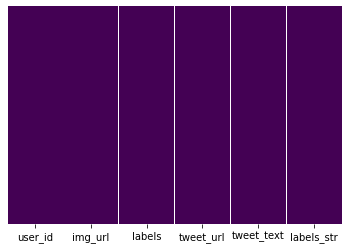

In [12]:
# deal with the NaN values in the data
sns.heatmap(preprocess_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# processedtext=[]
# for lis in preprocess_df['tweet_text']:
#     processedtext.append(lis)
# processedtext[1:5]

In [14]:
# preprocess_df['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in preprocess_df['tweet_text']]

In [15]:
# preprocess_df['tweet_text'][3]

In [16]:
# preprocess_df['text_lem'][3]

In [17]:
# Select first label in hate_speech labels
label_1 = []
for x in preprocess_df['labels'].values:
    label_1.append(x[0])
    
preprocess_df['label_1'] = label_1

In [18]:
preprocess_df['label_1']

0         4
1         5
2         0
3         1
4         1
         ..
149818    2
149819    0
149820    0
149821    1
149822    0
Name: label_1, Length: 149823, dtype: int64

## Cleaning the texts

In [19]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
      review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
      review = re.sub('RT', ' ', review)
      review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
      review = re.sub(r"https?", " ", review)
      review = re.sub('[^a-zA-Z]', ' ', review)
      review = review.lower()
      review = review.split()
      ps = PorterStemmer()
      review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
      review = ' '.join(review)
      corpus.append(review)

    return np.array(corpus)

In [20]:
corpus = preprocessing(preprocess_df['tweet_text'])
corpus.shape

(149823,)

In [21]:
corpus

array(['nigga', 'hors retard',
       'nigga momma youngboy spit real shit nigga', ...,
       'nigga big shitti',
       'say nigga rich amp said anger mmph lhhni lhhnyreunion',
       'nigga joe budden said thano got galact ass'], dtype='<U110')

# TF-IDF

In [22]:
X_train, X_test, y_train, y_test = train_test_split(corpus,preprocess_df['label_1'],test_size = 0.2,random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(preprocess_df['tweet_text'],preprocess_df['label_1'],test_size = 0.2,random_state=42)
print(f'Data Split done.')
# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

Data Split done.
X_train shape:  (119858,)
y_train shape:  (119858,)
X_test shape:  (29965,)
y_test.shape:  (29965,)


In [23]:
# create the transform
vectorizer = TfidfVectorizer(
        ngram_range=(1,4),
        use_idf=True,
        sublinear_tf=True,
        analyzer="word",
        tokenizer=None,
        preprocessor=None,
        stop_words=('english'),
        # token_pattern="^[a-zA-Z0-9_][a-zA-Z0-9_][a-zA-Z0-9_]*",
        max_features=None
    )

In [24]:
# # tokenize and build vocab
# vectorizer.fit_trainform(X_train)
# print(f'Vectoriser fitted.')
# print('No. of feature_words: ', len(vectorizer.get_feature_names()))

## Tranforming the dataset
Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.

In [25]:
# encode document
# X_train = vectorizer.transform(X_train)
# X_test  = vectorizer.transform(X_test)

vect_transformed_X_train = vectorizer.fit_transform(X_train)
# vect_transformed_X_test = vectorizer.fit_transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [26]:
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
# summarize encoded vector
print(vect_transformed_X_train.shape)
print(y_train.shape)

(119858, 878361)
(119858,)


In [28]:
type(vect_transformed_X_train[2])

scipy.sparse.csr.csr_matrix

## LinearSVC

In [29]:
import time
t = time.time()
svm_clf = SVC(kernel='linear')
modelSVC = svm_clf.fit(vect_transformed_X_train, y_train)
print(f'Training model complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Training model complete.
Time Taken: 11040 seconds


In [31]:
print(vect_transformed_X_test.shape)

(29965, 254912)


In [36]:
vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(1, 4), stop_words='english', sublinear_tf=True)

In [37]:
vect_transformed_X_test  = vectorizer.transform(X_test)
vect_transformed_X_test.shape

(29965, 878361)

In [40]:
predictionsSVC = svm_clf.predict(vect_transformed_X_test)

In [41]:
# sum(predictionsSVC==1),len(y_test),f1_score(y_test,predictionsSVC)

In [51]:
# save the model to disk
filename = 'SVM_model_onelabel.sav'
pickle.dump(svm_clf, open(filename, 'wb'))

## Report metrics

In [49]:
accuracy = accuracy_score(y_test, predictionsSVC)
print("Accuracy is: %.4f\n" % accuracy)

Accuracy is: 0.7014



In [47]:
print(classification_report(y_test, predictionsSVC))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82     20984
           1       0.46      0.08      0.14      4123
           2       0.32      0.02      0.05      1512
           3       0.46      0.32      0.38      1121
           4       0.50      0.02      0.05       121
           5       0.47      0.15      0.23      2104

    accuracy                           0.70     29965
   macro avg       0.49      0.26      0.28     29965
weighted avg       0.64      0.70      0.63     29965



F1 score is used as an evaluation measure as, when the data is skewed like in this case, where the number of hate speech tweets are very less, accuracy cannot be relied upon.